In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import emoji

In [52]:
# Charger les deux fichiers CSV
silver_I = pd.read_csv('data/silver_I.csv')
silver_II = pd.read_csv('data/silver_II.csv')

# Concaténer les deux DataFrames
df = pd.concat([silver_I, silver_II], ignore_index=True)

In [53]:
# Convertir la colonne "InvoiceDate" en format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Découpage du dataset par année :
mask_2009_2010 = (df['InvoiceDate'].dt.year < 2011)

#Commandes effectuées en 2009 et 2010
df_2009_2010 = df[mask_2009_2010]
#Commandes effectuées en 2011
df_2011 = df[~mask_2009_2010]

In [54]:
pd.set_option('display.max_columns', None)

In [55]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,Order_Quantity,Order_Total,Cancelled,Order_count,Cancelled_order_count,Percent_cancelled,Average_Quantity,Average_Price,Average_Basket,StockCode_count,Recency,Flag
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,166,505.30,False,10,0.0,0.0,9.08,12.41,63.16,51,738,🇬🇧
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,166,505.30,False,10,0.0,0.0,9.08,12.41,63.16,51,738,🇬🇧
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,166,505.30,False,10,0.0,0.0,9.08,12.41,63.16,51,738,🇬🇧
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,166,505.30,False,10,0.0,0.0,9.08,12.41,63.16,51,738,🇬🇧
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,166,505.30,False,10,0.0,0.0,9.08,12.41,63.16,51,738,🇬🇧
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033031,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,106,267.45,False,4,0.0,0.0,8.38,3.91,16.72,33,0,🇫🇷
1033032,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,106,267.45,False,4,0.0,0.0,8.38,3.91,16.72,33,0,🇫🇷
1033033,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,106,267.45,False,4,0.0,0.0,8.38,3.91,16.72,33,0,🇫🇷
1033034,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,106,267.45,False,4,0.0,0.0,8.38,3.91,16.72,33,0,🇫🇷


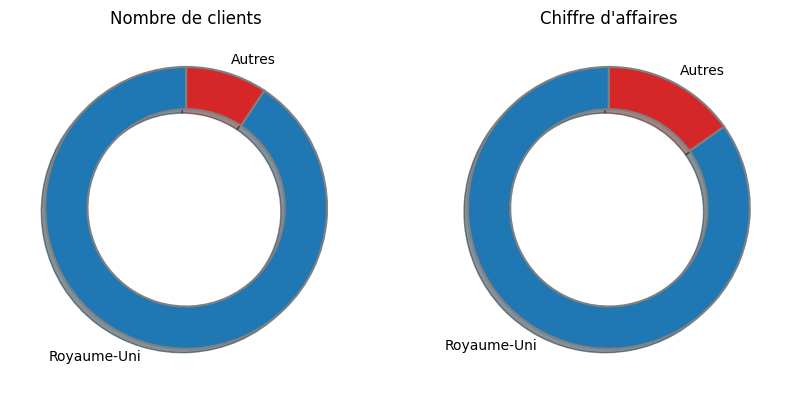

In [94]:
import matplotlib.pyplot as plt

# Créer la figure et les axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Titres des pie charts
ax1.set_title("Nombre de clients")
ax2.set_title("Chiffre d'affaires")

# Créer le premier pie chart (nombre de clients)
wedges1, texts1 = ax1.pie(customer_values, labels=customer_labels, colors=colors, startangle=90,
                          wedgeprops=dict(width=0.3, edgecolor='w'), shadow=True)

# Créer le deuxième pie chart (chiffre d'affaires)
wedges2, texts2 = ax2.pie(revenue_values, labels=revenue_labels, colors=colors, startangle=90,
                          wedgeprops=dict(width=0.3, edgecolor='w'), shadow=True)

# Ajouter du relief aux pie charts
for wedge1, text1, wedge2, text2 in zip(wedges1, texts1, wedges2, texts2):
    wedge1.set_edgecolor('gray')
    wedge1.set_linewidth(1.5)
    wedge2.set_edgecolor('gray')
    wedge2.set_linewidth(1.5)

# Afficher les pie charts
plt.show()


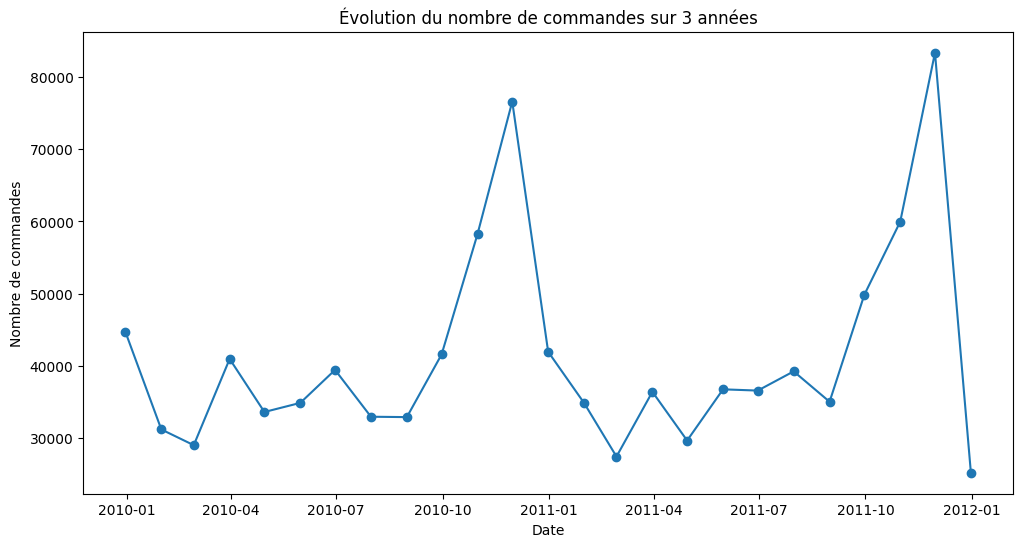

In [71]:
import matplotlib.pyplot as plt

# Grouper les données par intervalle et compter le nombre de commandes
df_grouped = df.groupby(pd.Grouper(key='InvoiceDate', freq='M')).size()

# Création du graphique
plt.figure(figsize=(12, 6))

# Tracé de la courbe avec des points reliés par une droite
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-')

# Personnalisation des axes et du titre
plt.xlabel('Date')
plt.ylabel('Nombre de commandes')
plt.title('Évolution du nombre de commandes sur 3 années')

# Affichage du graphique
plt.show()
